# Group 8 Bank Fraud Detection
* Group Members: 
    * Jason Ortiz
    * Kshitiz Badola
    * Sobnom Mostari
* Dataset:
    * Synthetic dataset of mibile money transactions found on Kaggle
        * Link: https://www.kaggle.com/datasets/ealaxi/paysim1
* Gameplan:
    * Initial look at data
    * EDA
    * Data Preprocessing
    * Baseline Models
    * XGBoost
    * MAYBE VOTING CLASSIFIER
    * Conclusion

##### Imports

In [1]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# Sci-Kit-KLearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# XGBoost
from xgboost.sklearn import XGBClassifier

# Initial Look at Data

In [2]:
original_df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
original_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
original_df.shape

(6362620, 11)

In [5]:
original_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
original_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Exploratory Data Analysis

In [7]:
original_df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [8]:
# Ratio of Fraudulent Data vs All Data
isFraud = original_df.loc[original_df.isFraud == 1]
fraud_total = len(isFraud)
fraud_vs_total_ratio = (fraud_total / original_df.shape[0]) * 100
transfer_fraud = original_df.loc[((isFraud.isFraud ==1)) & (original_df.type == 'TRANSFER')]
cashout_fraud = original_df.loc[((isFraud.isFraud ==1)) & (original_df.type == 'CASH_OUT')]

print(f'There are only {fraud_vs_total_ratio:.3f}% fraud transactions in the whole dataset, totaling {fraud_total}')

There are only 0.129% fraud transactions in the whole dataset, totaling 8213


In [9]:
isFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [10]:
print(f'Types of transactions: {original_df.type.unique()}')

Types of transactions: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [11]:
print(f'Types of fraudulent transactions: {isFraud.type.unique()}')

Types of fraudulent transactions: ['TRANSFER' 'CASH_OUT']


In [12]:
print(f"Number of fraudulent TRANSFERs: {len(transfer_fraud)}")

Number of fraudulent TRANSFERs: 4097


In [13]:
print(f"Number of fraudulent CASHOUTs: {len(cashout_fraud)}")

Number of fraudulent CASHOUTs: 4116


In [14]:
useful_data = original_df[(original_df.type == 'TRANSFER') | (original_df.type == 'CASH_OUT')]

In [15]:
useful_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [16]:
useful_data.isFlaggedFraud.value_counts()

0    2770393
1         16
Name: isFlaggedFraud, dtype: int64

In [17]:
useful_data = useful_data.drop('isFlaggedFraud', axis=1)

In [18]:
len(useful_data)/len(original_df)

0.4354195284332555

TODO

In [19]:
columns_to_encode = ['type', 'nameOrig']

In [20]:
useful_data['type']

2          TRANSFER
3          CASH_OUT
15         CASH_OUT
19         TRANSFER
24         TRANSFER
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 2770409, dtype: object

In [21]:
useful_data['type'] = useful_data['type'].astype('category')
useful_data['nameOrig'] = useful_data['nameOrig'].astype('category')
useful_data['nameDest'] = useful_data['nameDest'].astype('category')
useful_data.dtypes

step                 int64
type              category
amount             float64
nameOrig          category
oldbalanceOrg      float64
newbalanceOrig     float64
nameDest          category
oldbalanceDest     float64
newbalanceDest     float64
isFraud              int64
dtype: object

In [22]:
useful_data['type'] = useful_data['type'].cat.codes
useful_data['nameOrig'] = useful_data['nameOrig'].cat.codes
useful_data['nameDest'] = useful_data['nameDest'].cat.codes

In [23]:
useful_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,436008,181.0,0.0,391672,0.0,0.00,1
3,1,0,181.00,2539295,181.0,0.0,348886,21182.0,0.00,1
15,1,0,229133.94,2632251,15325.0,0.0,371535,5083.0,51513.44,0
19,1,1,215310.30,959849,705.0,0.0,26498,22425.0,0.00,0
24,1,1,311685.89,1408914,10835.0,0.0,491969,6267.0,2719172.89,0


In [24]:
# TODO
decision_features = useful_data.columns[:-1]
target_feature = useful_data.columns[-1]

In [25]:
X = useful_data[decision_features]
y = useful_data[target_feature]

In [26]:
X.shape

(2770409, 9)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=710)

In [28]:
standard_scaler = StandardScaler()
scaled_X = pd.DataFrame(standard_scaler.fit_transform(X))

In [29]:
scaled_X

,0,1,2,3,4,5,6,7,8
0,-1.701805,2.049062,-0.357467,-1.186522,-0.188847,-0.106389,0.929264,-0.403155,-0.438259
1,-1.701805,-0.488028,-0.357467,1.445082,-0.188847,-0.106389,0.638459,-0.398142,-0.438259
2,-1.701805,-0.488028,-0.099576,1.561387,-0.128591,-0.106389,0.792398,-0.401952,-0.427245
3,-1.701805,2.049062,-0.115146,-0.531099,-0.186762,-0.106389,-1.552723,-0.397848,-0.438259
4,-1.701805,2.049062,-0.006590,0.030764,-0.146456,-0.106389,1.610955,-0.401672,0.143134
...,...,...,...,...,...,...,...,...,...
2770404,3.537602,-0.488028,0.024945,1.348591,1.161997,-0.106389,1.329734,-0.403155,-0.365631
2770405,3.537602,2.049062,6.751458,-0.785110,24.922965,-0.106389,-0.153712,-0.403155,-0.438259
2770406,3.537602,-0.488028,6.751458,-1.441443,24.922965,-0.106389,-1.077564,-0.386947,0.925844
2770407,3.537602,2.049062,0.599766,-0.504285,3.192516,-0.106389,0.202551,-0.403155,-0.438259


In [30]:
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=710)

## Baseline Models
* KNN
* Logstic Regressor
    * SGDClassifier
* Naive Bayes
    * Gaussian
    * Burnoulli
* Decision Tree
* Random Forest

In [31]:
def train_and_rate_classifier(X_training_data, X_testing_data, y_training_data, y_testing_data,  model):
    
    model = model.fit(X_training_data, y_training_data)
    y_predict = model.predict(X_testing_data)
    
    cm = confusion_matrix(y_testing_data, y_predict)

    terminology = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:0.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(terminology, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10,7))
    sb.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

    print("Classification Report\n", classification_report(y_testing_data, y_predict))

    print("Accuracy Score\n", accuracy_score(y_testing_data, y_predict))
    
    strat_fold = StratifiedKFold(n_splits=5)
    print(f'Cross Validation Score (Stratified Folds) Training: {cross_val_score(model, X_training_data, y_training_data, cv=strat_fold)}')

### KNN
Parameters:
* .
* .
* .

In [32]:
def best_k_value(X, y):
    k_values = list(range(1, 10))

    # Create an empty list to store the cross-validation scores
    cv_scores = []
    cv_means = []
    cv_stds = []


    # Loop over the possible K values and compute the cross-validation score for each one
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
        cv_scores.append(scores)
        cv_means.append(scores.mean())
        cv_stds.append(scores.std())

    # Determine the best value of K
    best_k = k_values[np.argmax(cv_means)]

    plt.errorbar(k_values, cv_means, yerr=cv_stds, fmt='o')
    plt.xlabel('K-Value')
    plt.ylabel('Cross Validation Accuracy')
    plt.show()
    
    print(f'   Mean: {np.max(cv_means)}')
    print(f'   Standard Deviation: {cv_stds[np.argmax(cv_means)]}')
    print(f'The optimal K value = {best_k}')

    return {'best_k': best_k, 'cv_scores': cv_scores, 'cv_means': cv_means, 'cv_stds': cv_stds}

In [33]:
best_k_dict = best_k_value(scaled_X_train, y_train)

In [34]:
knn = KNeighborsClassifier(n_neighbors= best_k_dict['best_k']).fit(scaled_X_train, y_train)

In [35]:
# knn = KNeighborsClassifier(n_neighbors=7)

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       0.91      0.46      0.61      2365

    accuracy                           1.00    831123
   macro avg       0.95      0.73      0.80    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.9983263608394907
Cross Validation Score (Stratified Folds) Training: [0.99831897 0.99819521 0.99824935 0.9982674  0.99824162]


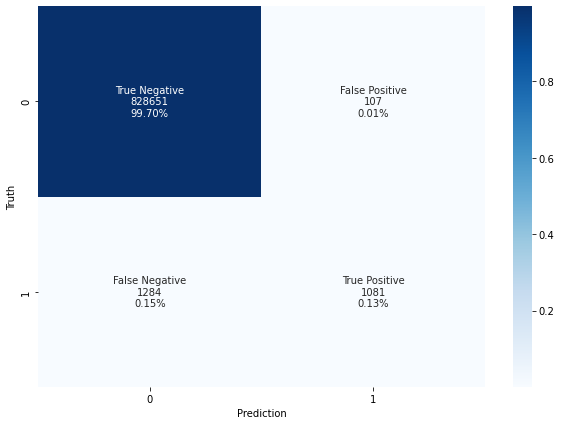

In [36]:
train_and_rate_classifier(scaled_X_train, scaled_X_test, y_train, y_test, knn)

### Logistic Regressor & SDGClassifier


#### Logistic Regressor Parameters:
* Default
* C-Adjusted ()

##### Default

In [ ]:
log_regressor = LogisticRegression()

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       0.91      0.47      0.62      2365

    accuracy                           1.00    831123
   macro avg       0.95      0.74      0.81    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.9983588470057981
Cross Validation Score (Stratified Folds) Training: [0.99831639 0.99821842 0.99827772 0.99821842 0.9982442 ]


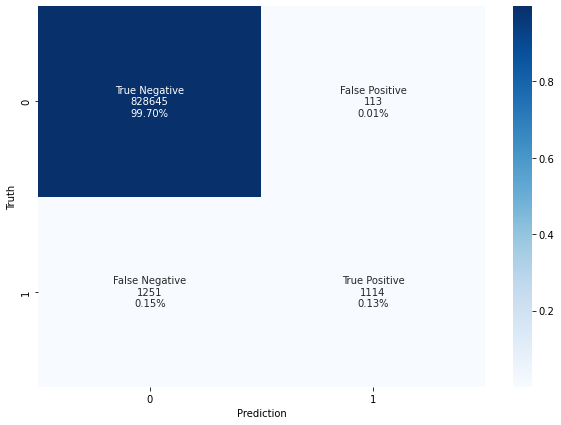

In [ ]:
train_and_rate_classifier(scaled_X_train, scaled_X_test, y_train, y_test, log_regressor)

##### C-Adjusted

In [ ]:
c_adj_log_regressor = LogisticRegression(C=100)

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       0.91      0.48      0.63      2365

    accuracy                           1.00    831123
   macro avg       0.95      0.74      0.82    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.9983937395547952
Cross Validation Score (Stratified Folds) Training: [0.99836538 0.99828545 0.99831897 0.99827514 0.99826998]


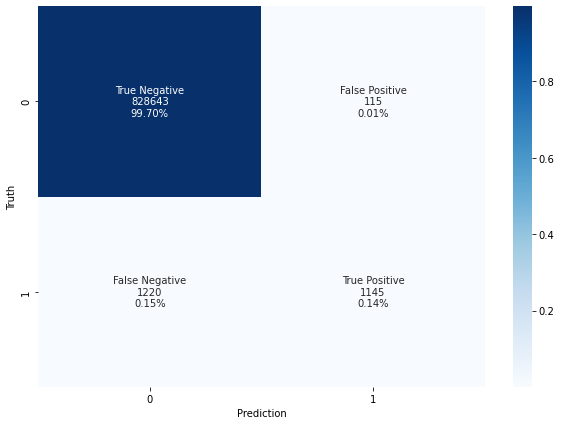

In [ ]:
train_and_rate_classifier(scaled_X_train, scaled_X_test, y_train, y_test, c_adj_log_regressor)

#### SDGClassifier Parameters:
* Default
* squared_error, 

#### Default

In [ ]:
sgd_classifier = SGDClassifier()

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       0.84      0.47      0.60      2365

    accuracy                           1.00    831123
   macro avg       0.92      0.73      0.80    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.9982276991492234
Cross Validation Score (Stratified Folds) Training: [0.99825709 0.99796059 0.99796575 0.99797864 0.99799668]


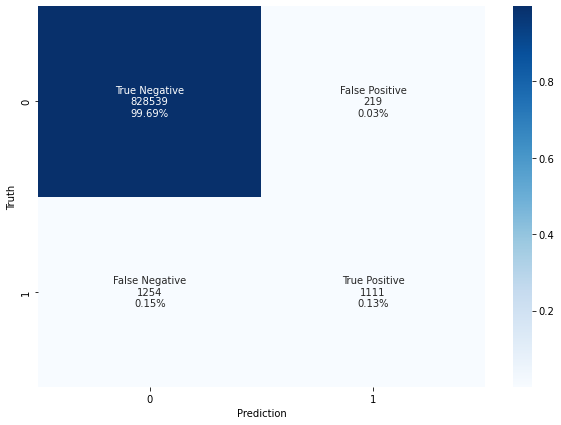

In [ ]:
train_and_rate_classifier(scaled_X_train, scaled_X_test, y_train, y_test, sgd_classifier)

#### Squared Error

In [ ]:
sgd_squared_error = SGDClassifier(loss='squared_error')

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       1.00      0.16      0.28      2365

    accuracy                           1.00    831123
   macro avg       1.00      0.58      0.64    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.997617681137449
Cross Validation Score (Stratified Folds) Training: [0.99754034 0.99693959 0.99412154 0.99739079 0.99731602]


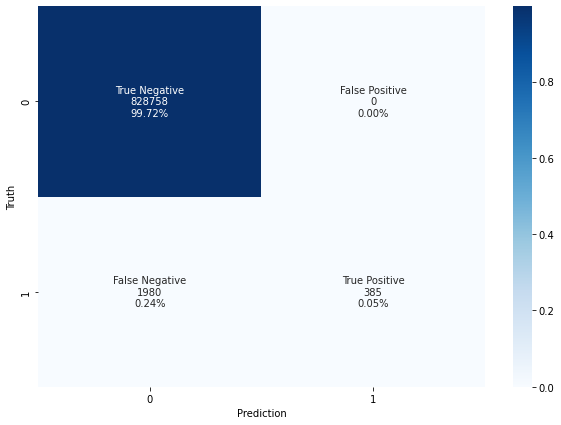

In [ ]:
train_and_rate_classifier(scaled_X_train, scaled_X_test, y_train, y_test, sgd_squared_error)

### Naive Bayes
* GaussianNB
* BurnoulliNB

#### Gaussian Naive Bayes Parameters:
* Default
* 

In [ ]:
gauss_nb = GaussianNB()

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    828758
           1       0.08      0.40      0.13      2365

    accuracy                           0.98    831123
   macro avg       0.54      0.69      0.56    831123
weighted avg       1.00      0.98      0.99    831123

Accuracy Score
 0.9849107773458321
Cross Validation Score (Stratified Folds) Training: [0.98529359 0.98477532 0.98410239 0.98525487 0.98521362]


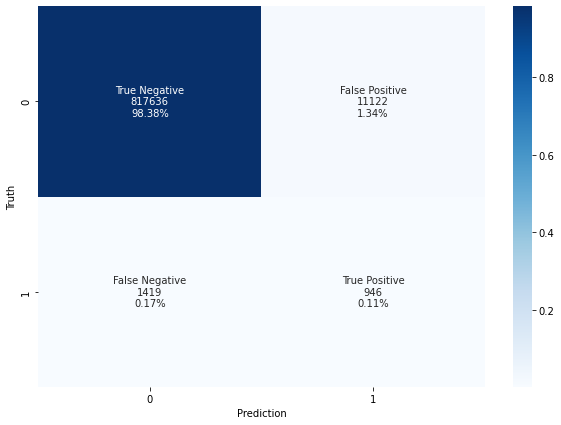

In [ ]:
train_and_rate_classifier(X_train, X_test, y_train, y_test, gauss_nb)

#### Burnoulli Naive Bayes Parameters:
* .
* .
* .

In [ ]:
bernoulli_nb = BernoulliNB()

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       0.77      0.50      0.60      2365

    accuracy                           1.00    831123
   macro avg       0.88      0.75      0.80    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.9981374597983692
Cross Validation Score (Stratified Folds) Training: [0.99802763 0.99803794 0.9979709  0.99804309 0.99802762]


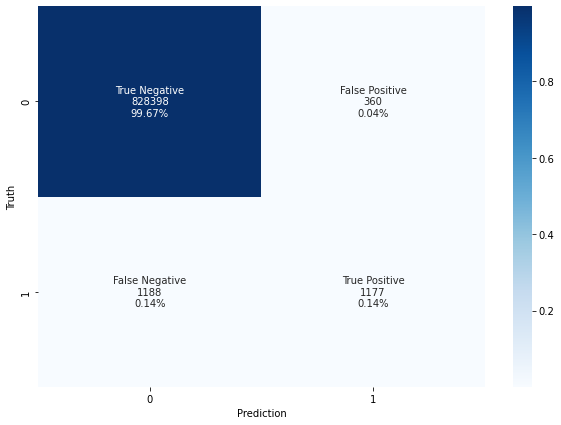

In [ ]:
train_and_rate_classifier(X_train, X_test, y_train, y_test, bernoulli_nb)

### Random Forest Classifier

#### Random Forest Classifier Parameters:
* .
* .
* .

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
train_and_rate_classifier(X_train, X_test, y_train, y_test, random_forest)

KeyboardInterrupt: 

### XGBoost Classifier
* Default Parameters (tree-based)
* Default Parameters (linear-based)
* Optimized Parameters

##### Tree Default Parameters

In [ ]:
xgboost_tree_default = XGBClassifier()

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       0.91      0.47      0.62      2365

    accuracy                           1.00    831123
   macro avg       0.95      0.74      0.81    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.9983588470057981


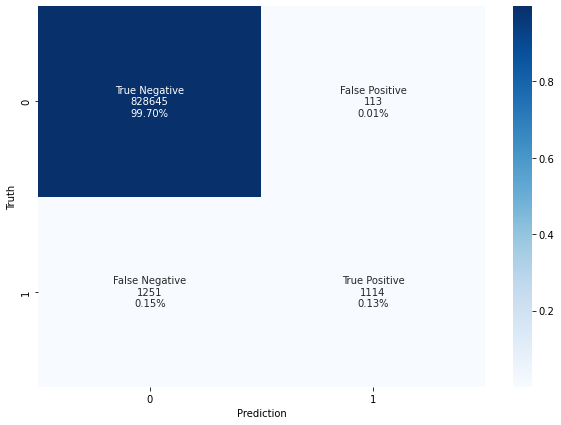

In [ ]:
train_and_rate_classifier(X_train, X_test, y_train, y_test, xgboost_tree_default)

##### Linear Default Parameters

In [ ]:
xgboost_linear_default = XGBClassifier(booster='gblinear')

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828758
           1       0.91      0.47      0.62      2365

    accuracy                           1.00    831123
   macro avg       0.95      0.74      0.81    831123
weighted avg       1.00      1.00      1.00    831123

Accuracy Score
 0.9983588470057981


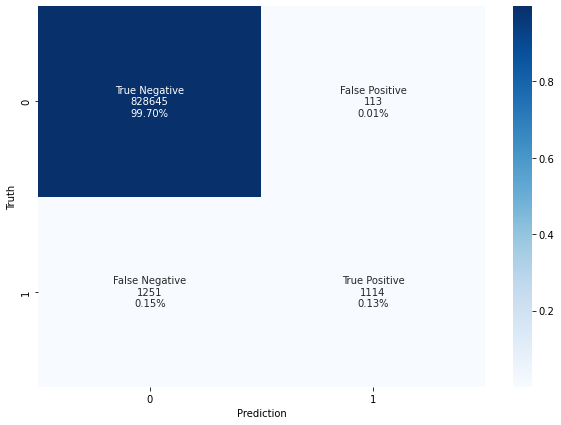

In [ ]:
train_and_rate_classifier(scaled_X_train, scaled_X_test, y_train, y_test, xgboost_linear_default)